In [ ]:
!pip install japanize-matplotlib

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt
import numpy as np
# import japanize_matplotlib
# 日本語フォントの設定
import matplotlib
matplotlib.rcParams['font.family'] = 'UD Digi Kyokasho N-R'

## 残差二乗和の計算

In [3]:
# データの準備
X = [25,   60,   75,    95,    40,   75,   160,   130,   110]
y = [1800, 2500, 19200, 9500, 3200, 8000, 18000, 22000, 14000]

parameter1 = {'a': 0, 'b': 12000}  # y = 0x + 12000
parameter2 = {'a': 20, 'b': 0}  # y = 20x
parameter3 = {'a': -80, 'b': 15000}  # y = -80x + 15000
parameter4 = {'a': 150, 'b': -1500}  # y = 150x - 1500

paramter_list = [
    parameter1, parameter2, parameter3, parameter4
]

for index, parameter in enumerate(paramter_list):

  sum_error = 0
  for i in range(len(X)):
    y_pred = parameter['a'] * X[i] + parameter['b'] # 予想値の計算
    residual = y[i] - y_pred # 残差の計算
    residual_squared = residual ** 2 # 残差二乗の計算

    sum_error += residual_squared # 残差二乗和の計算

  print(f'parameter{index + 1}: {sum_error}')

parameter1: 485820000
parameter2: 1157080000
parameter3: 981380000
parameter4: 167070000


## scikit-learn による単回帰・重回帰分析の実践

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression


area =     [25,   60,   75,    95,   40,   75,   160,   130,   110]
distance = [15,   30,   3,     15,   10,   20,   10,    5,     15]
price =    [1800, 2500, 19200, 9500, 3200, 8000, 18000, 22000, 14000]

df = pd.DataFrame({'price': price, 'area': area, 'distance': distance})
print(df)

X1 = df[['area']]  # 単回帰用の説明変数
X2 = df[['area', 'distance']]  # 重回帰用の説明変数
y = df['price']  # 目的変数

# y = w1 * area + w0
model1 = LinearRegression() # 線形回帰を行うインスタンスの生成
model1.fit(X1, y) # 学習（残差二乗和を最小にするパラメータの計算）
print('回帰係数=', model1.coef_)  # w1
print('切片=', model1.intercept_)  # w0

# y = w1 * area + w2 * distance + w0
model2 = LinearRegression() # 線形回帰を行うインスタンスの生成
model2.fit(X2, y) # 学習（残差二乗和を最小にするパラメータの計算）

print('回帰係数=', model2.coef_)  # w1, w2
print('切片=', model2.intercept_)  # w0

   price  area  distance
0   1800    25        15
1   2500    60        30
2  19200    75         3
3   9500    95        15
4   3200    40        10
5   8000    75        20
6  18000   160        10
7  22000   130         5
8  14000   110        15
回帰係数= [144.64392804]
切片= -1463.980509745128
回帰係数= [ 116.73990171 -460.40780613]
切片= 7215.603982291252


## 様々な回帰式でパラメータを求める

In [5]:
X = [0,    0.04, 0.26, 0.3,  0.32, 0.54, 0.6,  0.76, 0.84, 0.94]
y = [4.94, 5.06, 5.04, 4.91, 4.89, 4.33, 4.15, 4.33, 4.65, 5.77]

<Figure size 640x480 with 0 Axes>

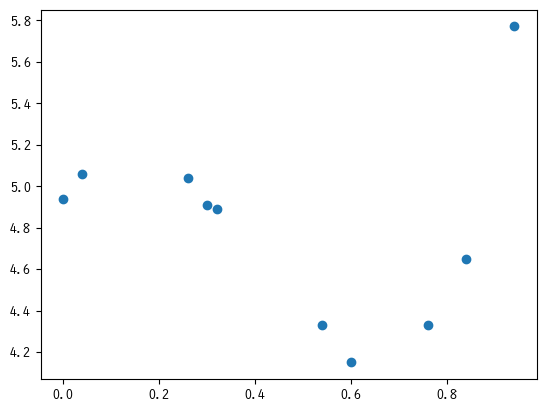

<Figure size 640x480 with 0 Axes>

In [6]:
plt.scatter(X, y)
plt.figure()

In [7]:
def generate_powed_data_set(x, pow_number):
  x_pow = []
  xx = np.array(x)
  xx = xx.reshape(len(x), 1)

  for i in range(1, pow_number + 1):
    x_pow.append(xx ** i)

  mat = np.concatenate(x_pow, axis=1)
  return mat


def calculate_lr_param(x, data_Y, pow_number):
  data_X = generate_powed_data_set(x, pow_number)

  lr = LinearRegression()
  lr.fit(data_X, data_Y)
  print(lr.coef_, lr.intercept_)

In [8]:
calculate_lr_param(X, y, 1)

[-0.11701245] 4.860825726141078


In [9]:
calculate_lr_param(X, y, 2)

[-3.2333673   3.35160707] 5.262053979068297


In [10]:
calculate_lr_param(X, y, 3)

[  4.53882506 -19.90033551  16.98391967] 4.919832208672748


In [11]:
calculate_lr_param(X, y, 9)

[-2.24641956e+01  9.94490683e+02 -1.09683837e+04  5.66112666e+04
 -1.62589476e+05  2.75253690e+05 -2.73351949e+05  1.47397134e+05
 -3.33267272e+04] 4.940000000012998


## リッジ・ラッソ回帰実践


In [12]:
X = [0,    0.04, 0.26, 0.3,  0.32, 0.54, 0.6,  0.76, 0.84, 0.94]
y = [4.94, 5.06, 5.04, 4.91, 4.89, 4.33, 4.15, 4.33, 4.65, 5.77]

In [13]:
df = pd.DataFrame({'x': X, 'y': y})
for i in range(2, 10):
  df['x^{}'.format(i)] = df['x'] ** i # 2~9次の項を作成する

y_columns = ['y']
x_columns = ['x^9', 'x^8', 'x^7', 'x^6', 'x^5', 'x^4', 'x^3', 'x^2', 'x']

data_x = df[x_columns]
data_y = df[y_columns]

# インスタンスを生成
lr = LinearRegression()
lasso = Lasso(alpha=0.001)
ridge = Ridge(alpha=0.001)
elastic = ElasticNet(alpha=0.001)

# パラメータ学習
lr.fit(data_x, data_y)
lasso.fit(data_x, data_y)
ridge.fit(data_x, data_y)
elastic.fit(data_x, data_y)

print('lr_coef: {}'.format(lr.coef_))
print('lr_intercept: {}'.format(lr.intercept_))
print('lasso_coef: {}'.format(lasso.coef_))
print('lasso_intercept: {}'.format(lasso.intercept_))
print('ridge_coef: {}'.format(ridge.coef_))
print('ridge_intercept: {}'.format(ridge.intercept_))
print('elastic_coef: {}'.format(elastic.coef_))
print('elastic_intercept: {}'.format(elastic.intercept_))

lr_coef: [[-3.33267272e+04  1.47397134e+05 -2.73351949e+05  2.75253690e+05
  -1.62589476e+05  5.66112666e+04 -1.09683837e+04  9.94490683e+02
  -2.24641956e+01]]
lr_intercept: [4.94]
lasso_coef: [ 0.          1.12579139  2.73082293  0.60152062  0.          0.
 -0.         -2.4553454   0.        ]
lasso_intercept: [5.06367238]
ridge_coef: [[-0.38488837  0.40106634  1.21636572  1.88062558  2.05496063  1.21046532
  -1.16114964 -4.18563956  0.92469354]]
ridge_intercept: [5.01022304]
elastic_coef: [ 0.90254431  1.05904134  1.12345588  0.99078953  0.51152571  0.
 -0.30099945 -2.19552538 -0.06088401]
elastic_intercept: [5.06097843]


c:\Users\shuho.hidaka\AppData\Local\anaconda3\envs\pycaret_20240724_01\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.257e-03, tolerance: 1.992e-04
  model = cd_fast.enet_coordinate_descent(


## MLP

In [14]:
from sklearn.neural_network import MLPRegressor
import numpy as np

In [15]:
X_memory = [4, 8, 8, 12, 16]
X_hdd = [128, 512, 256, 1024, 512]
y = [5, 12, 10, 20, 23]

X = np.array([X_memory, X_hdd]).T
y = np.array(y)

print(X.shape, y.shape)

model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000)
model.fit(X, y)

print(model.coefs_)

(5, 2) (5,)
[array([[ 0.08802951,  0.00148473, -0.02368667, -0.36618022,  0.52146308,
        -0.14555552,  0.58777278,  0.06734848, -0.16101078,  0.50287077],
       [ 0.14868411, -0.04222035, -0.02864201,  0.59119943, -0.00669133,
         0.5424374 ,  0.02839004,  0.54847504, -0.01974408,  0.38375308]]), array([[-1.94088671e-22, -1.09352491e-02,  2.28678941e-01,
        -3.52005682e-01, -1.12113184e-02,  3.52273080e-25,
        -7.30114974e-02,  4.62471881e-01,  5.64709470e-01,
        -1.70512831e-01],
       [-2.39321778e-15,  5.76096807e-06, -3.07521065e-04,
        -3.55089884e-09,  4.35762613e-22,  9.25992525e-25,
        -1.50462985e-08, -4.07149736e-09, -1.53444924e-10,
        -8.35630087e-03],
       [-3.68438683e-07,  7.08267590e-04,  2.30820950e-02,
         2.21526674e-02,  4.25195269e-03, -3.74282671e-25,
         2.29581489e-02,  7.04621348e-03, -2.87159466e-02,
        -2.26080276e-02],
       [-6.57711606e-26, -2.47865713e-10, -4.72505872e-02,
         2.44598604e-01

c:\Users\shuho.hidaka\AppData\Local\anaconda3\envs\pycaret_20240724_01\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## PyCaret

!pip install pycaret==3.0.4  # 書籍執筆時点のバージョンをインストール


# 最新版をインストール場合はこちら
# !pip install pycaret 最新版をインストール

In [16]:
import pycaret


pycaret.__version__

'3.3.2'

In [17]:
from pycaret.datasets import get_data


data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
from pycaret.regression import *


s = setup(data, target ='charges', session_id=123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [19]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.1000
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.1790
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.0870
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.1610
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0590
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0560
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0540
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0440
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.0440
lasso,Lasso Regression,4303.7697,38386797.6709,6176.4824,0.7306,0.5952,0.4434,0.0500


In [20]:
best

GradientBoostingRegressor(random_state=123)